In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import pandas as pd
import re

In [8]:
def read_rewards(filename):
    rewards = []
    with open(filename, "r") as f:
        line = f.readline()
        while line:
            rew = float(line.split()[-1])
            rewards.append(rew)
            line = f.readline()
    return np.array(rewards)

In [10]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [9]:
single = read_rewards("data/reward_NoisyLunarLander-v2_single.txt")
transfer = read_rewards("data/reward_NoisyLunarLander-v2_transfer.txt")

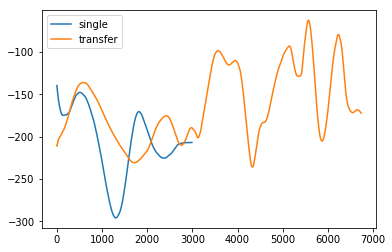

In [20]:
n = len(single)
xs = list(range(0, n, 10))
plt.plot(smooth(single, 0.99), label="single")
plt.plot(smooth(transfer, 0.99), label="transfer")
plt.legend()
plt.show()